In [1]:
# 1) Instalar e importar bibliotecas
!pip -q install pandas requests matplotlib

import requests, pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta

In [3]:
# 2) Definir intervalo (últimos 30 dias)
hoje = date.today()
inicio = hoje - timedelta(days=30)
print('Período:', inicio, '→', hoje)

Período: 2025-08-20 → 2025-09-19


In [4]:
# 3) Baixar dados da API Frankfurter
# Docs: https://www.frankfurter.app/docs/
url = f"https://api.frankfurter.app/{inicio}..{hoje}?from=USD&to=BRL"
print("URL:", url)

resp = requests.get(url, timeout=30)
if resp.status_code != 200:
    raise SystemExit(f"Erro na API: {resp.status_code} - {resp.text[:200]}")

dados = resp.json()
# 'rates' é um dict com datas como chaves e {"BRL": valor} como valor.

df = (
    pd.DataFrame(dados["rates"])
      .T.rename(columns={"BRL": "cotacao"})
      .reset_index()
      .rename(columns={"index": "data"})
      .sort_values("data")
)
df["data"] = pd.to_datetime(df["data"])
print("Linhas:", len(df))
display(df.head())


URL: https://api.frankfurter.app/2025-08-20..2025-09-19?from=USD&to=BRL
Linhas: 22


,data,cotacao
0,2025-08-20,5.4835
1,2025-08-21,5.4860
2,2025-08-22,5.4671
3,2025-08-25,5.4291
4,2025-08-26,5.4043


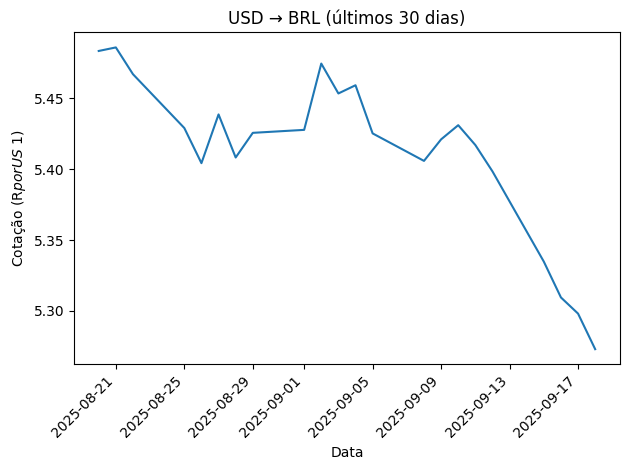

KeyError: 'mm7'

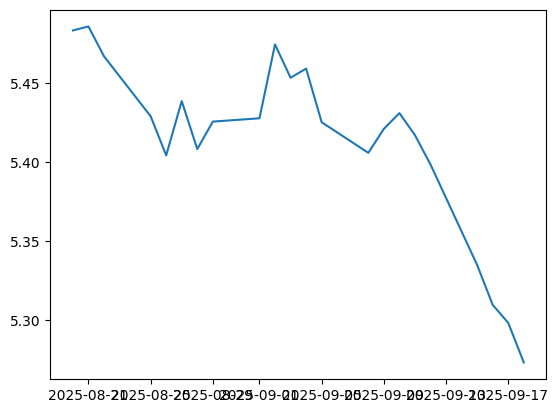

In [6]:
# 5) Gráficos (um por figura, sem estilos/cores)
# Série simples
plt.figure()
plt.plot(df["data"], df["cotacao"])
plt.title("USD → BRL (últimos 30 dias)")
plt.xlabel("Data")
plt.ylabel("Cotação (R$ por US$ 1)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("usd_brl_ultimos_30_dias.png", dpi=150)
plt.show()

# Série + média móvel (7d)
plt.figure()
plt.plot(df["data"], df["cotacao"], label="Cotação")
plt.plot(df["data"], df["mm7"], label="Média móvel (7d)")
plt.title("USD → BRL com média móvel (7 dias)")
plt.xlabel("Data")
plt.ylabel("Cotação (R$ por US$ 1)")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.savefig("usd_brl_ultimos_30_dias_mm7.png", dpi=150)
plt.show()

print("✅ Gráficos salvos: usd_brl_ultimos_30_dias.png e usd_brl_ultimos_30_dias_mm7.png")


In [7]:
# 6) Salvar arquivos de saída
df.to_csv("usd_brl_ultimos_30_dias.csv", index=False)

linhas = [
    f"Período: {inicio} → {hoje}",
    f"Dias: {len(df)}",
    f"Mínimo: R${df['cotacao'].min():.4f}",
    f"Máximo: R${df['cotacao'].max():.4f}",
    f"Média: R${df['cotacao'].mean():.4f}",
]
with open("resumo.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(linhas))

print("✅ Arquivos salvos: usd_brl_ultimos_30_dias.csv, resumo.txt")


✅ Arquivos salvos: usd_brl_ultimos_30_dias.csv, resumo.txt


In [10]:
# 7) Downloads individuais (use se quiser baixar direto)
from google.colab import files
files.download("usd_brl_ultimos_30_dias.csv")
files.download("usd_brl_ultimos_30_dias.png")
files.download("usd_brl_ultimos_30_dias_mm7.png")
files.download("resumo.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

FileNotFoundError: Cannot find file: usd_brl_ultimos_30_dias_mm7.png

In [9]:
# 8) Gerar um ZIP com tudo (opcional)
import zipfile, os
from google.colab import files

zip_name = "Projeto_API_Cotacao.zip"
files_to_zip = [
    "Projeto_API_USD_BRL_Colab.ipynb",   # lembre de salvar o notebook antes
    "usd_brl_ultimos_30_dias.csv",
    "usd_brl_ultimos_30_dias.png",
    "usd_brl_ultimos_30_dias_mm7.png",
    "resumo.txt",
]

missing = [f for f in files_to_zip if not os.path.exists(f)]
if missing:
    print("Arquivos ausentes (rode as células anteriores e salve o notebook):", missing)
else:
    with zipfile.ZipFile(zip_name, "w") as z:
        for f in files_to_zip:
            z.write(f)
    print("✅ Zip criado:", zip_name)
    files.download(zip_name)


Arquivos ausentes (rode as células anteriores e salve o notebook): ['Projeto_API_USD_BRL_Colab.ipynb', 'usd_brl_ultimos_30_dias_mm7.png']
